# Train a MLR model on the event stream as output of the DVS
## Makes a training set

In [1]:
%load_ext autoreload
%autoreload 2

from aprovhots import fit_MLR, predict_data
from dataset_creation import Synthetic_Dataset
from HOTS.tools import score_classif_events, score_classif_time, get_dataset_info, get_loader
from HOTS.network import network
import tonic #, os

path = '/home/INT/grimaldi.a/Documents/projets/WP3/2021-12-06_simulator_data/'
patch_size = (32,32)
max_duration = 1e3
date = '2022-01-03'
# we set tau_cla emprirically based on the ISI for SEA samples (see Make_dataset notebook)
tau_from_isi = 200#15/5
tau_cla = tau_from_isi*patch_size[0]*patch_size[1]*2
tau_cla = 3

trainset = Synthetic_Dataset(save_to=path, train=True, patch_size=patch_size, max_duration=max_duration)
testset = Synthetic_Dataset(save_to=path, train=False, patch_size=patch_size, max_duration=max_duration)

number of samples in the trainset: 8528
number of samples in the testset: 4663
----------------------------------------
number of samples in each class for the trainset: [4788. 3740.]
number of samples in each class for the testset: [3444. 1219.]
----------------------------------------


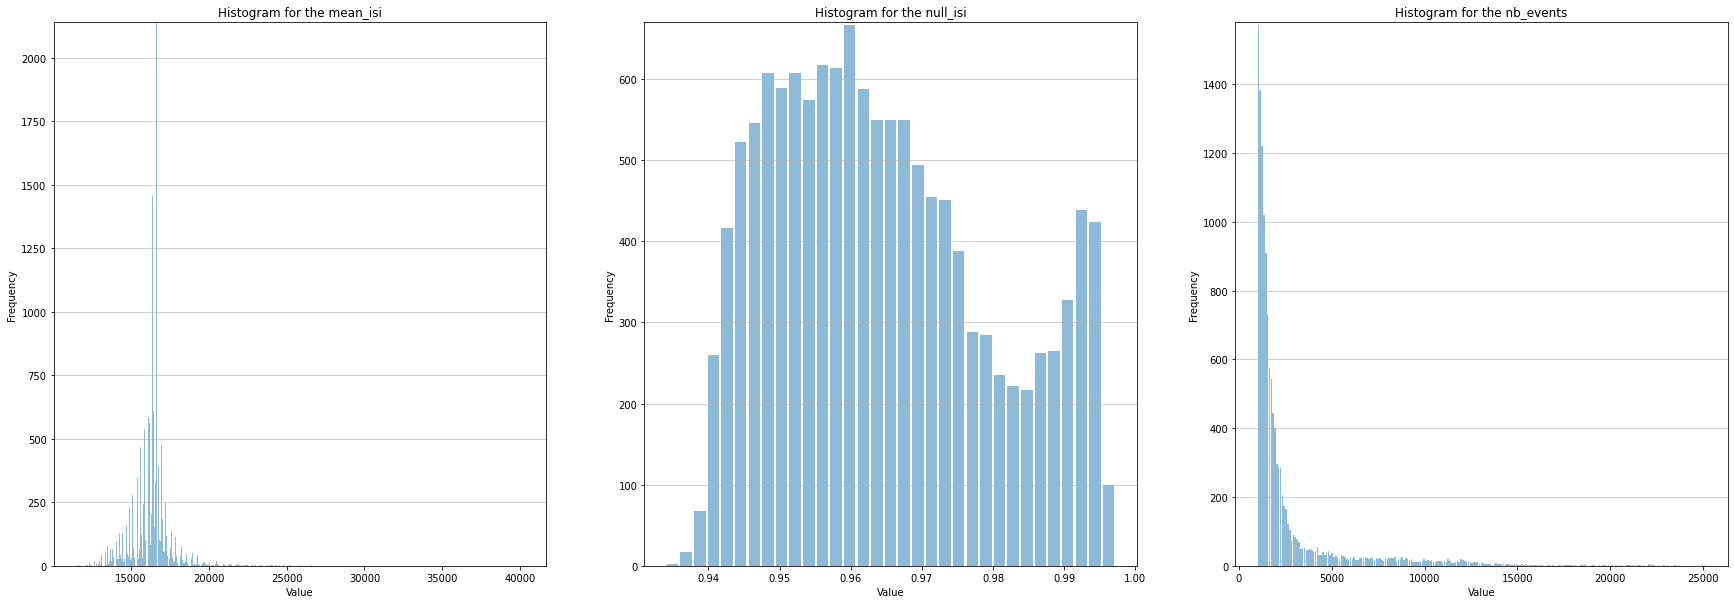

In [2]:
values = get_dataset_info(trainset, testset)

number of samples in the trainset: 8528
number of samples in the testset: 4663
----------------------------------------
number of samples in each class for the trainset: [4788. 3740.]
number of samples in each class for the testset: [3444. 1219.]
----------------------------------------


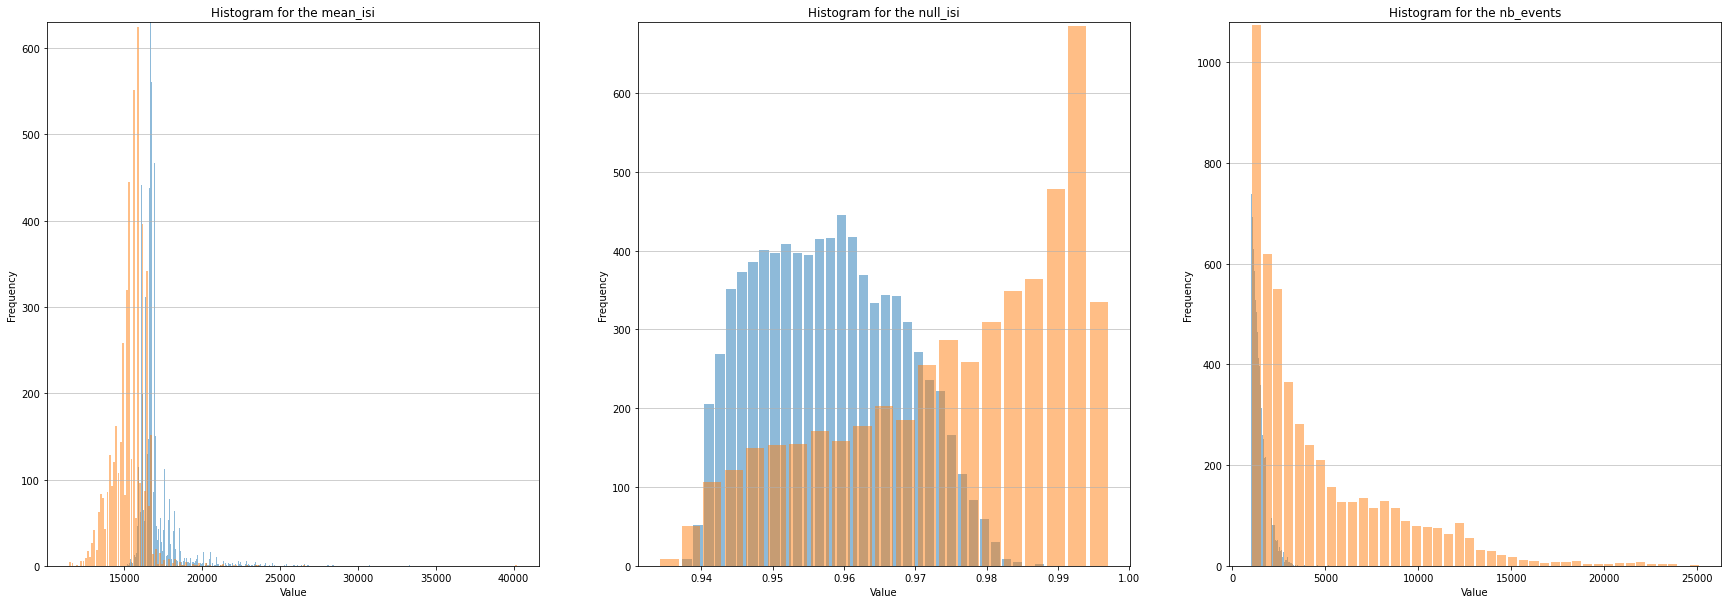

In [3]:
values = get_dataset_info(trainset, testset, distinguish_labels=True)

## Classification with MLR on raw events

In [4]:
kfold = 5
MLR_model, losses = fit_MLR(path, date, tau_cla, patch_size=patch_size, max_duration = max_duration, kfold=kfold)

../Records/models/2022-01-03_RAW_3_(32, 32)_5_LR.pkl
Number of training samples: 1704
device -> cuda - num workers -> 0


  3%|████▎                                                                                                                                         | 1/33 [03:18<1:45:50, 198.44s/it]

loss for epoch number 0: 0.4439782430827929


  6%|████████▌                                                                                                                                     | 2/33 [06:33<1:41:27, 196.38s/it]

loss for epoch number 1: 0.9603702464463416


  9%|████████████▉                                                                                                                                 | 3/33 [09:49<1:38:03, 196.13s/it]

loss for epoch number 2: 0.6646523946317356


 12%|█████████████████▏                                                                                                                            | 4/33 [13:03<1:34:30, 195.54s/it]

loss for epoch number 3: 0.24007626245296756


 15%|█████████████████████▌                                                                                                                        | 5/33 [16:16<1:30:45, 194.48s/it]

loss for epoch number 4: 0.6357166896533182


 18%|█████████████████████████▊                                                                                                                    | 6/33 [19:29<1:27:17, 193.99s/it]

loss for epoch number 5: 0.13667949853694455


 21%|██████████████████████████████                                                                                                                | 7/33 [22:43<1:23:59, 193.84s/it]

loss for epoch number 6: 0.5611199891332141


 24%|██████████████████████████████████▍                                                                                                           | 8/33 [25:56<1:20:40, 193.62s/it]

loss for epoch number 7: 0.08867723448363223


 27%|██████████████████████████████████████▋                                                                                                       | 9/33 [29:09<1:17:25, 193.56s/it]

loss for epoch number 8: 0.790396260232207


 30%|██████████████████████████████████████████▋                                                                                                  | 10/33 [32:22<1:14:08, 193.43s/it]

loss for epoch number 9: 0.49141348480811825


 33%|███████████████████████████████████████████████                                                                                              | 11/33 [35:37<1:11:01, 193.70s/it]

loss for epoch number 10: 0.5324079431977361


 36%|███████████████████████████████████████████████████▎                                                                                         | 12/33 [38:51<1:07:52, 193.93s/it]

loss for epoch number 11: 0.9734281029952896


 39%|███████████████████████████████████████████████████████▌                                                                                     | 13/33 [42:06<1:04:44, 194.25s/it]

loss for epoch number 12: 0.25734649482003846


 42%|███████████████████████████████████████████████████████████▊                                                                                 | 14/33 [45:21<1:01:34, 194.46s/it]

loss for epoch number 13: 0.6079185454801933


 45%|█████████████████████████████████████████████████████████████████                                                                              | 15/33 [48:38<58:35, 195.30s/it]

loss for epoch number 14: 0.24626538911992651


 48%|█████████████████████████████████████████████████████████████████████▎                                                                         | 16/33 [51:54<55:23, 195.53s/it]

loss for epoch number 15: 0.6682623918007753


 52%|█████████████████████████████████████████████████████████████████████████▋                                                                     | 17/33 [55:11<52:13, 195.82s/it]

loss for epoch number 16: 1.0885101393862615


 55%|██████████████████████████████████████████████████████████████████████████████                                                                 | 18/33 [58:25<48:51, 195.43s/it]

loss for epoch number 17: 1.7171879203304157


 58%|█████████████████████████████████████████████████████████████████████████████████▏                                                           | 19/33 [1:01:38<45:24, 194.57s/it]

loss for epoch number 18: 1.2318105894876819


 61%|█████████████████████████████████████████████████████████████████████████████████████▍                                                       | 20/33 [1:04:53<42:11, 194.75s/it]

loss for epoch number 19: 0.9367882630183945


 64%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 21/33 [1:08:06<38:49, 194.14s/it]

loss for epoch number 20: 0.18588599433179315


 67%|██████████████████████████████████████████████████████████████████████████████████████████████                                               | 22/33 [1:11:21<35:40, 194.60s/it]

loss for epoch number 21: 1.063368002533136


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 23/33 [1:14:37<32:30, 195.05s/it]

loss for epoch number 22: 0.2329271002235486


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 24/33 [1:17:52<29:12, 194.77s/it]

loss for epoch number 23: 0.26314321285758424


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 25/33 [1:21:05<25:55, 194.50s/it]

loss for epoch number 24: 0.4019483515760262


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 26/33 [1:24:23<22:47, 195.43s/it]

loss for epoch number 25: 0.4536140741436918


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 27/33 [1:27:38<19:31, 195.20s/it]

loss for epoch number 26: 0.27934897183266105


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 28/33 [1:30:51<16:12, 194.59s/it]

loss for epoch number 27: 1.3152209760620264


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 29/33 [1:34:04<12:56, 194.00s/it]

loss for epoch number 28: 0.3487690289186053


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 30/33 [1:37:19<09:43, 194.57s/it]

loss for epoch number 29: 0.6599110011953204


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 31/33 [1:40:39<06:32, 196.05s/it]

loss for epoch number 30: 1.6852256713866902


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 32/33 [1:43:56<03:16, 196.23s/it]

loss for epoch number 31: 0.4804881272425194


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [1:47:12<00:00, 194.93s/it]

loss for epoch number 32: 0.7226611001138161


In [5]:
likelihood, true_target, timestamps = predict_data(path, date, tau_cla, patch_size=patch_size, max_duration = max_duration, kfold=kfold)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 932/932 [01:53<00:00,  8.24it/s]


Mean accuracy: 74.6%


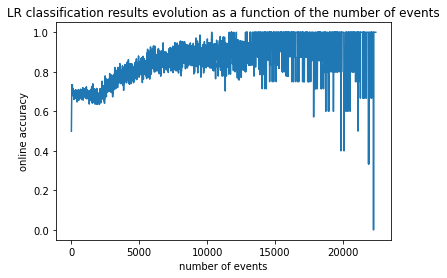

In [6]:
meanac, onlinac, lastac, truepos, falsepos = score_classif_events(likelihood, true_target)

### Higher threshold

/home/INT/grimaldi.a/Documents/projets/HOTS/newhots/HOTS/tools.py:354: RuntimeWarning: Mean of empty slice
  onlinac = np.nanmean(matscor, axis=0)


Mean accuracy: 98.4%


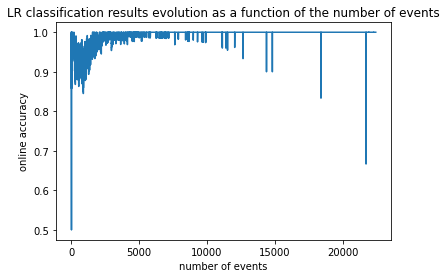

In [7]:
likelihood_threshold = .9
meanac, onlinac, lastac, truepos, falsepos = score_classif_events(likelihood, true_target, thres=likelihood_threshold)

  0%|                                                                                                                                                        | 0/932 [00:00<?, ?it/s]/home/INT/grimaldi.a/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/INT/grimaldi.a/.local/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 932/932 [00:47<00:00, 19.78it/s]
/home/INT/grimaldi.a/Documents/projets/HOTS/newhots/HOTS/tools.py:415: RuntimeWarning: Mean of empty slice
  onlinac = np.nanmean(matscor, axis=0)


Mean accuracy: 79.4%


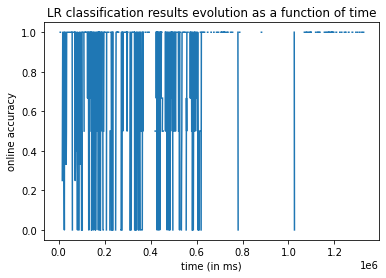

In [8]:
timestep = 1e6 # 1ms
meanac, onlinac, lastac, truepos, falsepos = score_classif_time(likelihood, true_target, timestamps, timestep= timestep)

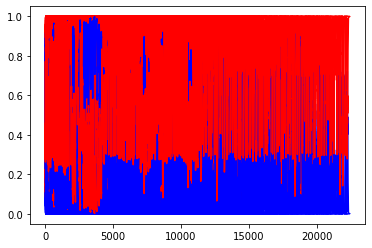

In [9]:
import matplotlib.pyplot as plt
for sample in range(len(likelihood)):
    plt.plot(likelihood[sample][:,0], 'b')
    plt.plot(likelihood[sample][:,1], 'r')

2048